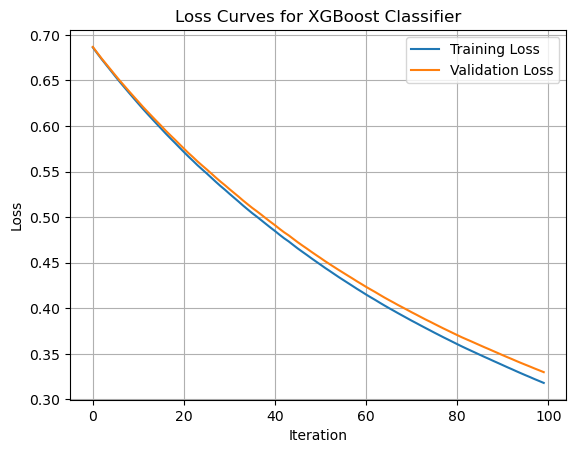

 Accuracy: 94.143%
 AUC score: 0.942
Precision: 0.969
Recall: 0.916
F1-score: 0.942
MCC: 0.884
Mean Squared Error (MSE) : 0.059
Mean Absolute Error (MAE): 0.059


In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# SPLITTING THE DATASET
df = pd.read_csv('DATASET-balanced 1.csv')
x = df.drop('LABEL', axis = 1)
y = df['LABEL']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Initialize an XGBoost classifier
model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)

# Train the model and plot the loss graph
history = model.fit(x_train, y_train,
                    eval_set=[(x_train, y_train), (x_test, y_test)],
                    early_stopping_rounds=10,
                    verbose=False,
                    eval_metric='logloss')

# Plot the loss graph
fig, ax = plt.subplots()
ax.plot(history.evals_result()['validation_0']['logloss'], label='Training Loss')
ax.plot(history.evals_result()['validation_1']['logloss'], label='Validation Loss')
ax.set_xlabel('Iteration')
ax.set_ylabel('Loss')
ax.set_title('Loss Curves for XGBoost Classifier')
ax.legend()
ax.grid(True)
plt.show()

# Calculate and print metrics
pred_final = model.predict(x_test)
accuracy = round(accuracy_score(y_test, pred_final) * 100, 3)
auc = round(roc_auc_score(y_test, pred_final), 3)
prec = round(precision_score(y_test, pred_final, average="binary", pos_label=1), 3)
rec = round(recall_score(y_test, pred_final, average="binary", pos_label=1), 3)
f1 = round(f1_score(y_test, pred_final, average="binary", pos_label=1), 3)
mcc = round(matthews_corrcoef(y_test, pred_final), 3)
mse = round(mean_squared_error(y_test, pred_final), 3)
mae = round(mean_absolute_error(y_test, pred_final), 3)
print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("MCC:", mcc)
print("Mean Squared Error (MSE) :", mse)
print("Mean Absolute Error (MAE):", mae)

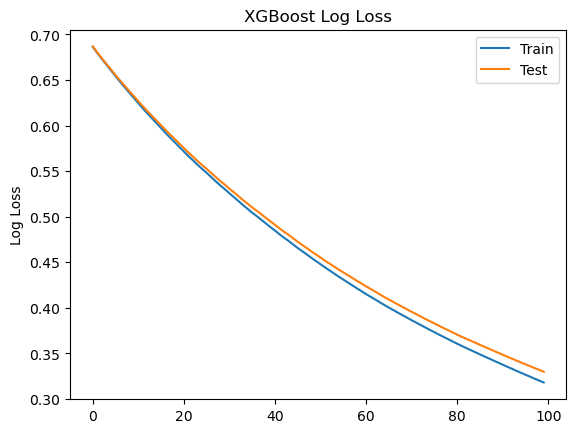

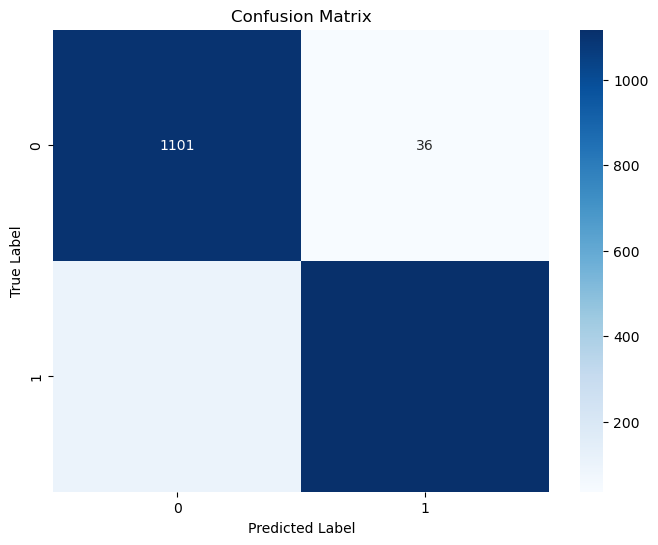

In [2]:
# Train the model
model.fit(x_train, y_train)

# Plot the loss curve
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# Plot the confusion matrix (heat map)
pred_final = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()